# Data Analysis

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [4]:
engine_df = pd.read_csv('engine_data.csv')

In [5]:
engine_df


,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0
...,...,...,...,...,...,...,...
19530,902,4.117296,4.981360,4.346564,75.951627,87.925087,1
19531,694,4.817720,10.866701,6.186689,75.281430,74.928459,1
19532,684,2.673344,4.927376,1.903572,76.844940,86.337345,1
19533,696,3.094163,8.291816,1.221729,77.179693,73.624396,1


In [6]:
engine_df.shape

(19535, 7)

Lets check if the dataframe contains any missing values or not

In [7]:
engine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [8]:
engine_df["Engine Condition"] = engine_df["Engine Condition"].astype('category')
engine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Engine rpm        19535 non-null  int64   
 1   Lub oil pressure  19535 non-null  float64 
 2   Fuel pressure     19535 non-null  float64 
 3   Coolant pressure  19535 non-null  float64 
 4   lub oil temp      19535 non-null  float64 
 5   Coolant temp      19535 non-null  float64 
 6   Engine Condition  19535 non-null  category
dtypes: category(1), float64(5), int64(1)
memory usage: 935.0 KB


In [9]:
engine_df.isnull().sum()

Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
Engine Condition    0
dtype: int64

<Axes: >

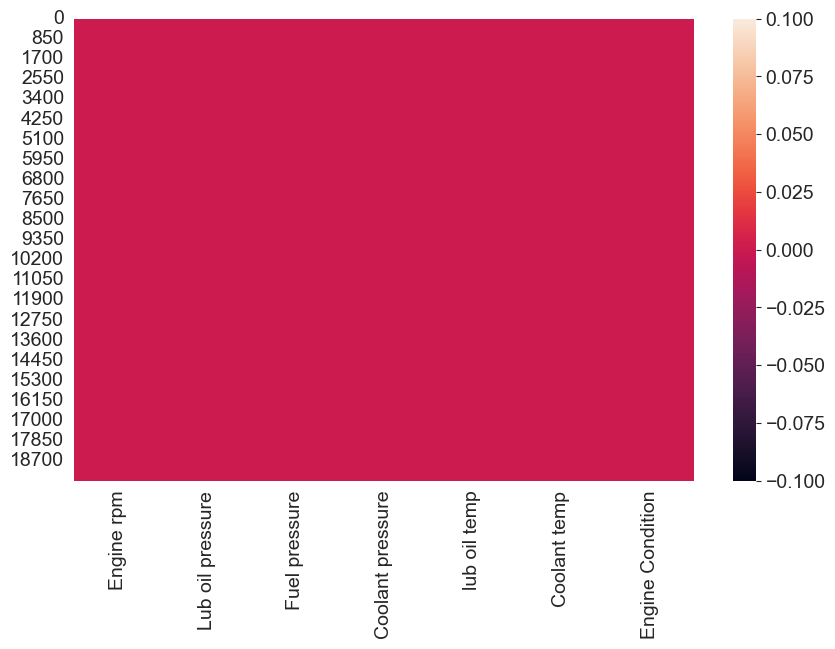

In [10]:
sns.heatmap(engine_df.isnull())

In [11]:
engine_df.describe()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912


In [12]:
engine_df.columns

Index(['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure',
       'lub oil temp', 'Coolant temp', 'Engine Condition'],
      dtype='object')

In [14]:
engine_df["Engine Condition"].value_counts()

Engine Condition
1    12317
0     7218
Name: count, dtype: int64

In [16]:
engine_df["Engine Condition"].value_counts()/len(engine_df)

Engine Condition
1    0.630509
0    0.369491
Name: count, dtype: float64

## Exploratory Data Analysis and Visualization

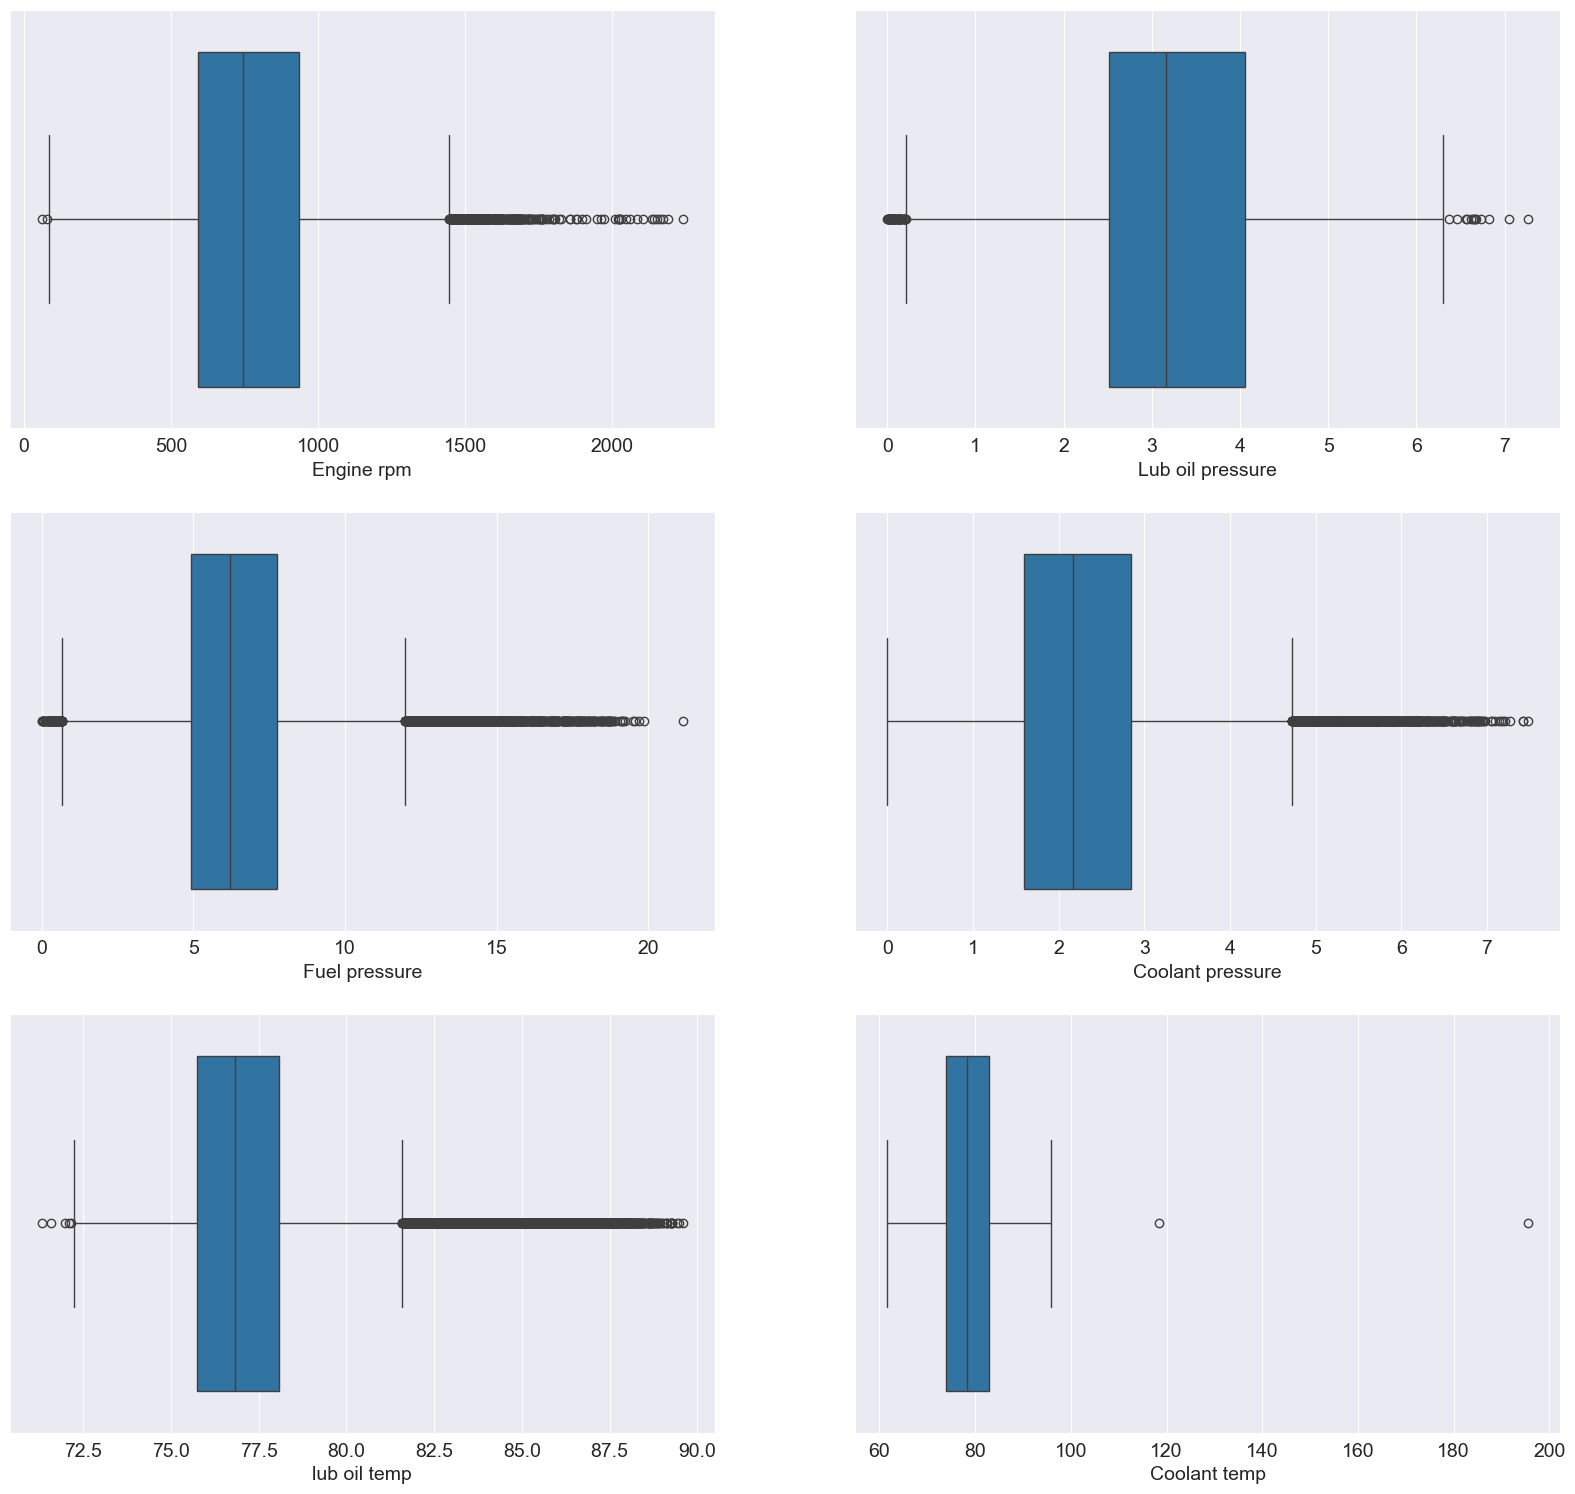

In [19]:
plt.figure(figsize=(20,25))
columns = engine_df.columns.to_list()[:-1]

for i in range(0,len(columns)):
    plt.subplot(4,2,i+1)
    sns.boxplot(data = engine_df, x = columns[i])

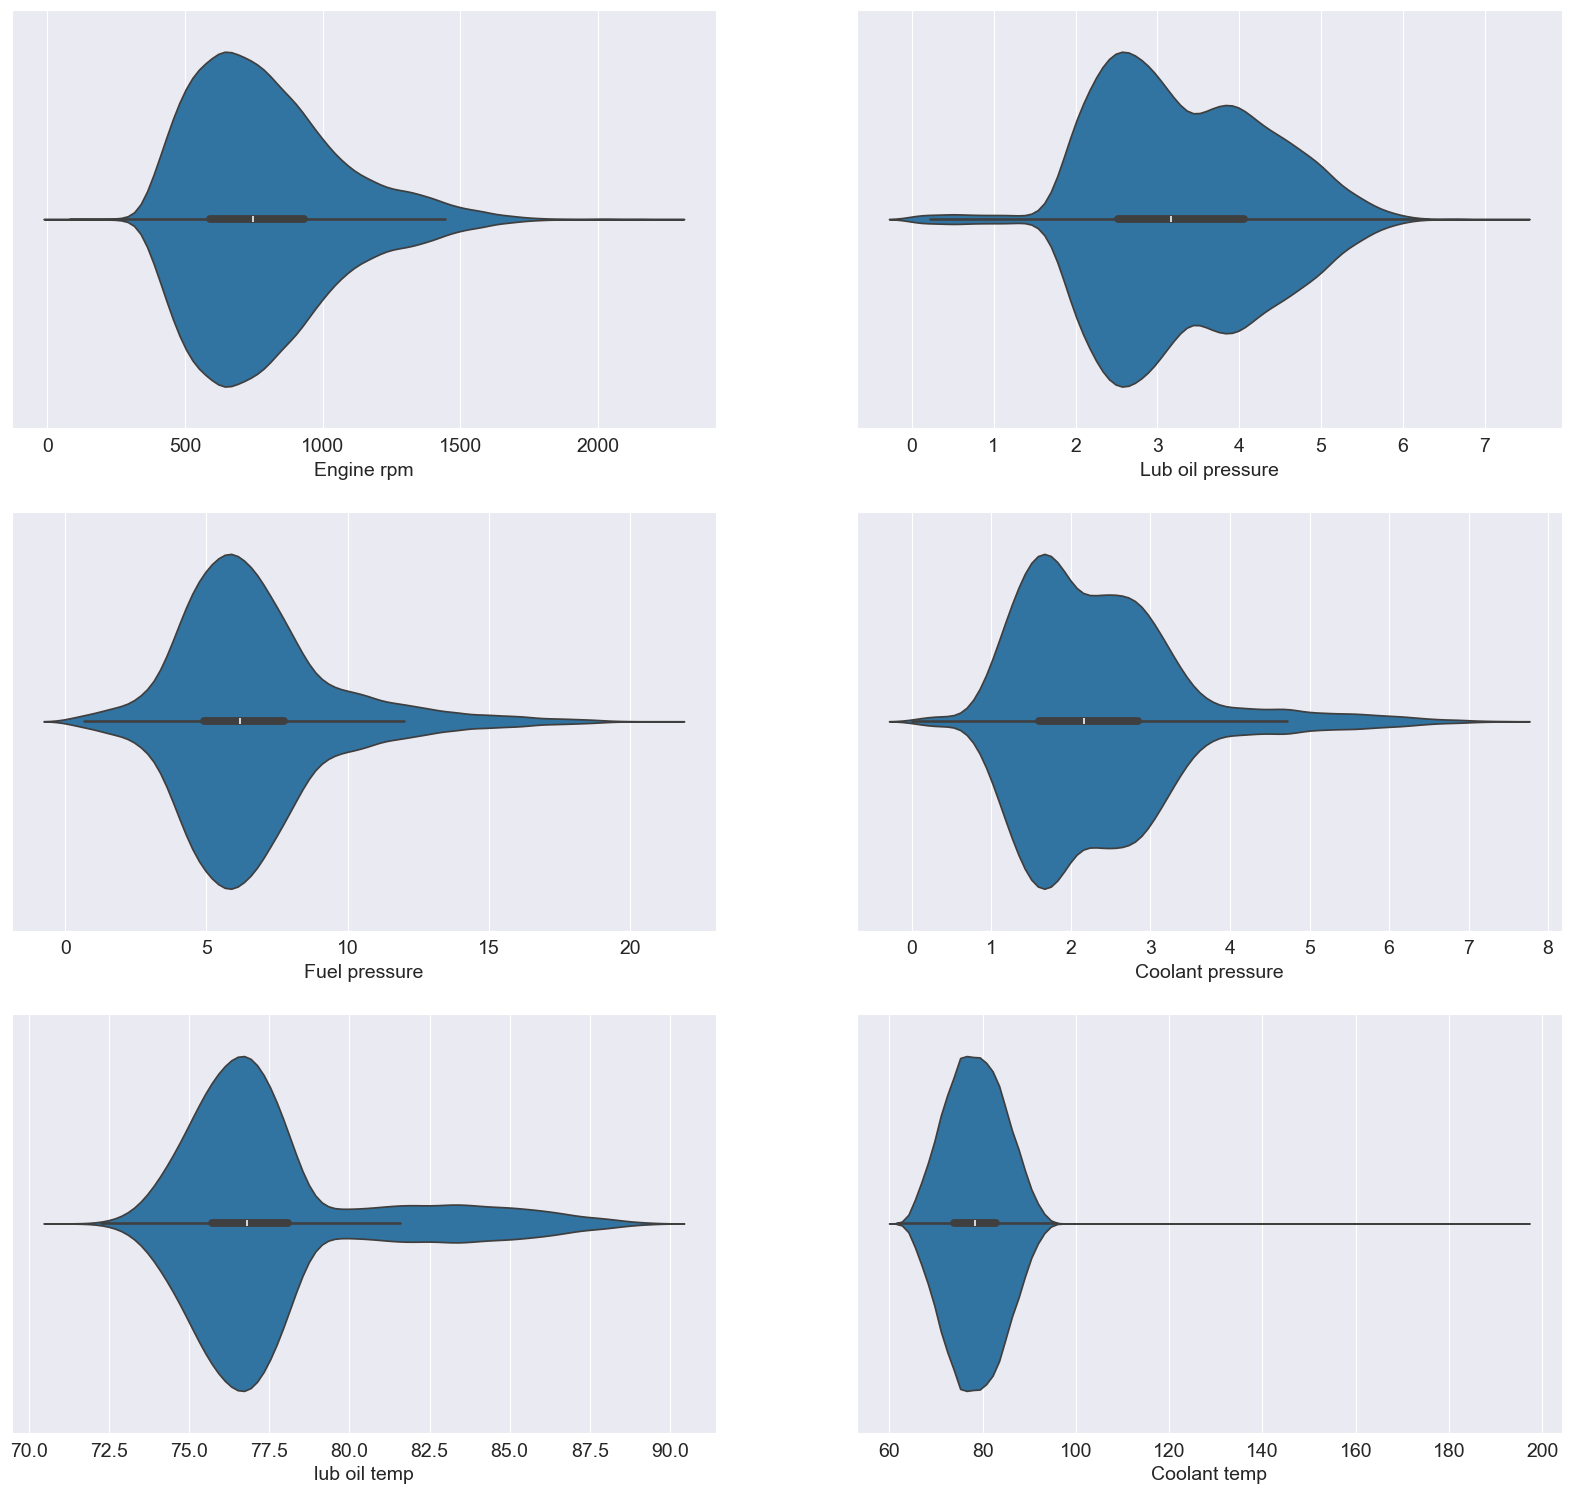

In [20]:
plt.figure(figsize=(20,25))
for i in range(0,len(columns)):
    plt.subplot(4,2,i+1)
    sns.violinplot(data = engine_df, x = columns[i])
    

test data also contians outliers

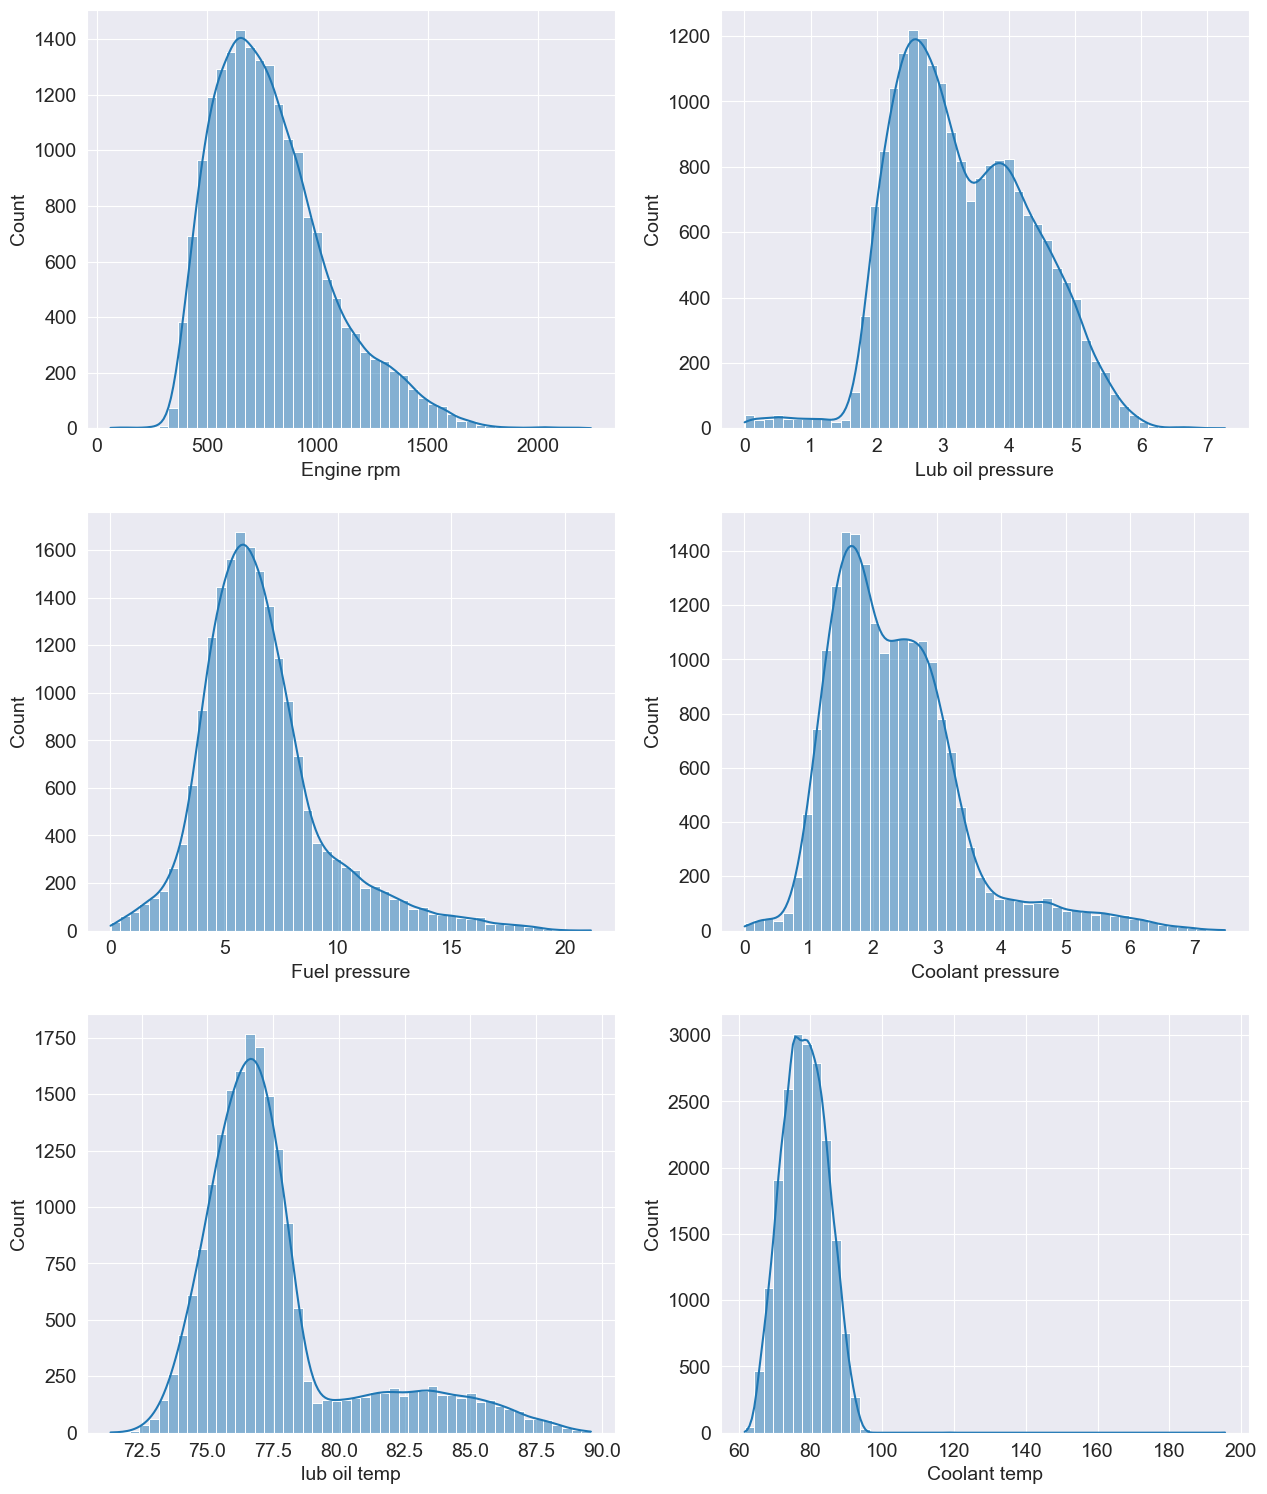

In [21]:
plt.figure(figsize= (15,25))
for i in range(len(columns)):
    plt.subplot(4,2,i+1)
    sns.histplot(data = engine_df,x = columns[i],bins =50,kde=True)
    

### Correlation

<Axes: >

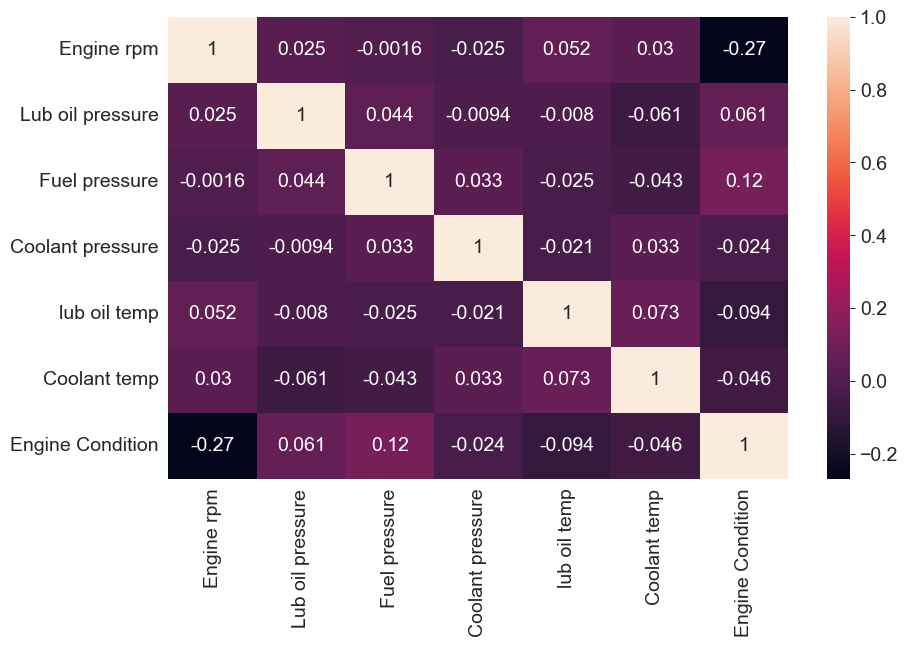

In [22]:
sns.heatmap(data = engine_df.corr(),annot=True)

In [23]:
df = engine_df.corr()

In [31]:
df.columns

Index(['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure',
       'lub oil temp', 'Coolant temp', 'Engine Condition'],
      dtype='object')

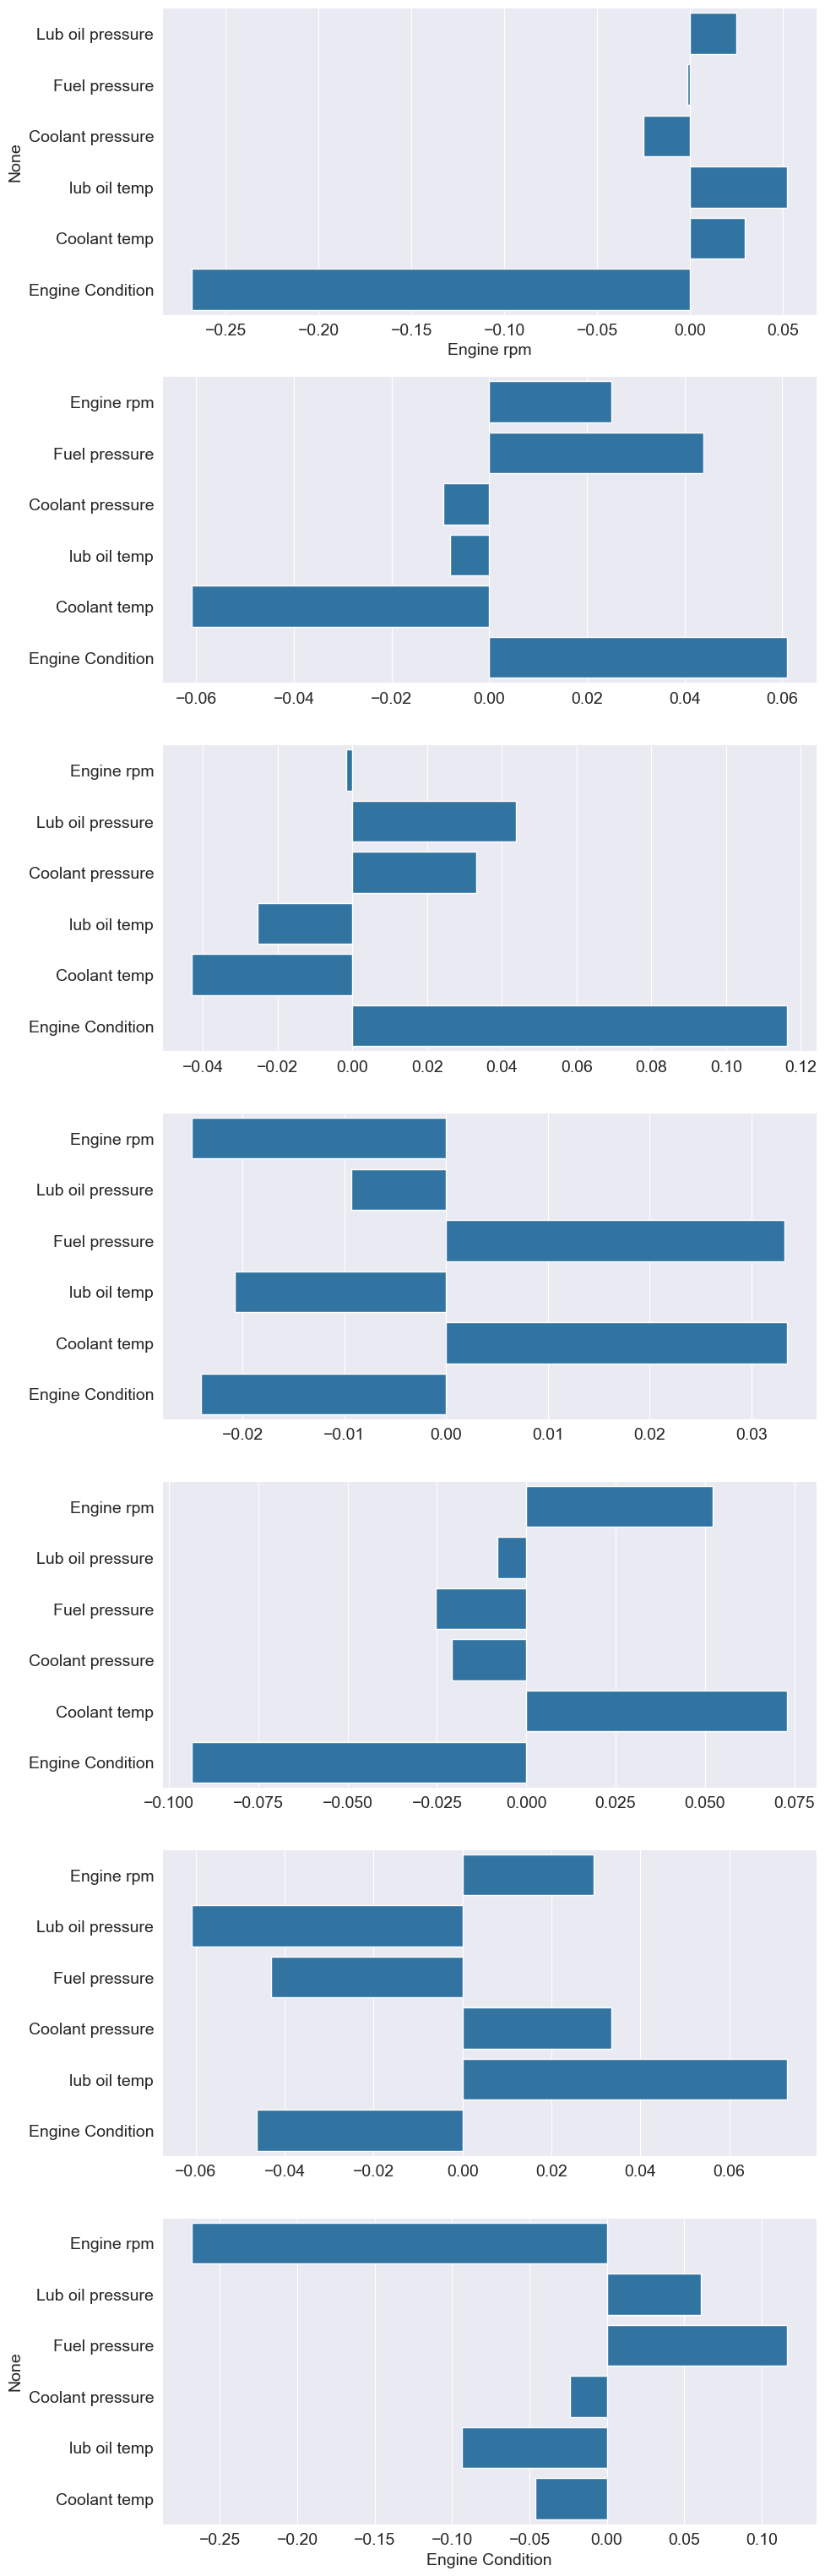

In [42]:
plt.figure(figsize= (10,50))
for i in range(len(df.columns)):
    plt.subplot(9,1,i+1)
    if i == 0 :
        y = df.columns[i + 1:]
        x = df[df.columns[i]][i + 1:]
    elif i == len(df.columns) - 1:
        y = df.columns[:i]
        x = df[df.columns[i]][:i]
    else :
        y = list(df.columns[:i]) + list(df.columns[i + 1:])
        x = list(df[df.columns[i]][:i]) + list(df[df.columns[i]][i + 1:])

    sns.barplot(y=y,x=x)


<Figure size 10000x5000 with 0 Axes>

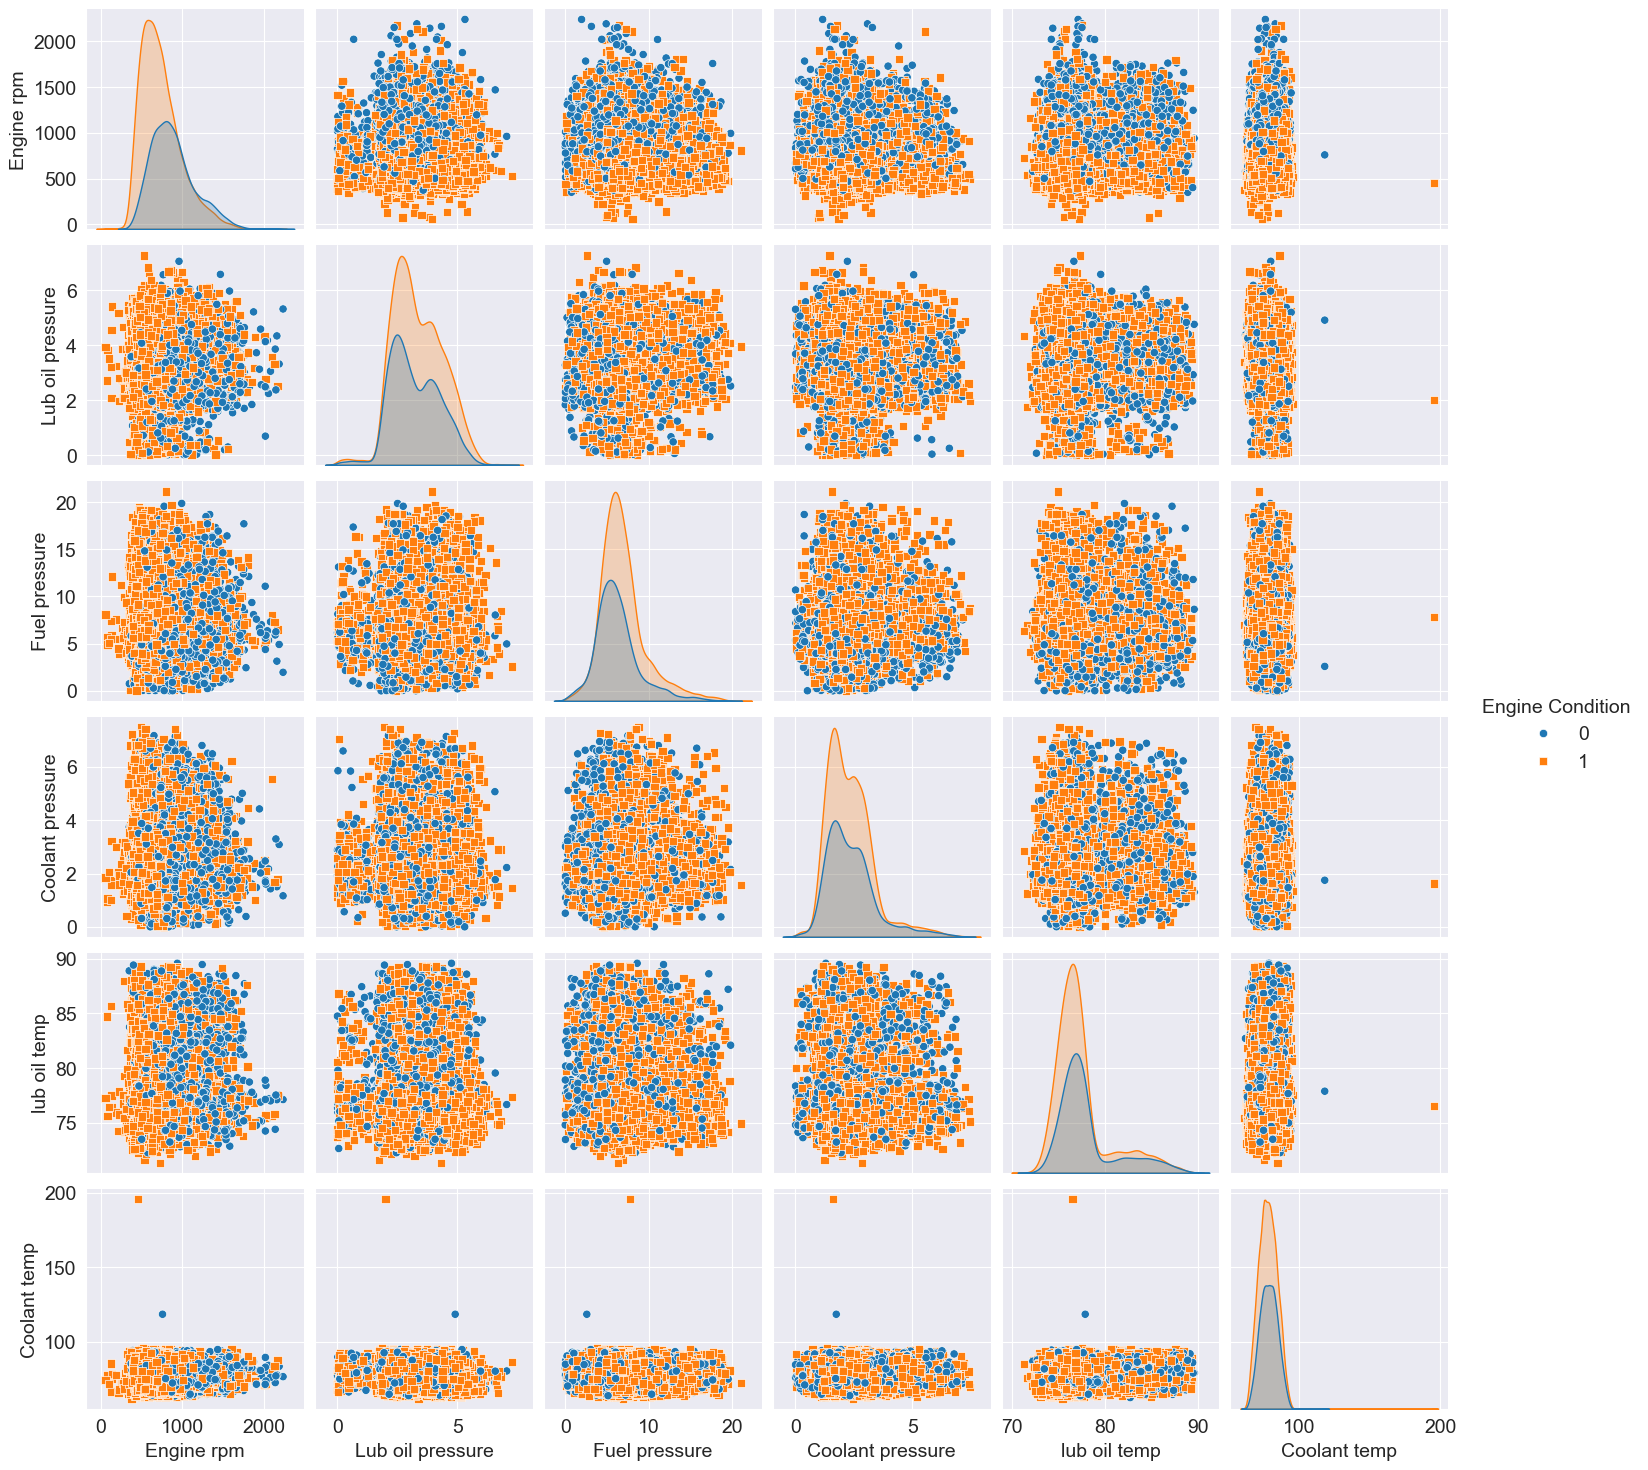

In [45]:
plt.figure(figsize=(100,50))

sns.pairplot(engine_df,hue="Engine Condition",markers=["o", "s"])
